# Housing Data Preparation and Analysis

### Author : AFANDI Soufiane 
#### Linkedin : https://www.linkedin.com/in/afandi-soufiane/
--------------------------------------------------------------------------------------------------------------------------------------

**Project overview :**

I am using the ***Scrapy framework*** to scrape datasets from websites offering real estate listings for sales and rentals. The goal is to analyze this data and develop a ***Machine Learning*** model that ***suggests*** listings to clients based on their preferences and financial capabilities. 

This involves extracting relevant features from the listings, such as location, price, property type, and amenities, and using these features to train a ***recommendation system***. 

The system will leverage data analysis, data science techniques, and business intelligence to provide personalized and financially feasible real estate options for clients. 

This project aims to enhance the user experience and optimize the property search process, ultimately driving better business outcomes for real estate platforms.


**Current Notebook :**

In this notebook i am going to prepare a dataset that i scrapped using Scrapy Framework from ***Mubawab*** and ***Avito*** website.

- Mubawab is a leading real estate portal for Morocco. Rent, buy and sell with ease thanks to the widest choice of real estate.

- Avito is the number 1 platform for selling and purchasing goods and services.

# 1. Setup Environment

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from datetime import datetime, timedelta
from dateutil import relativedelta

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AFANDI
[nltk_data]     Soufiane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
english_stop_words = stopwords.words('english')
french_stop_words = stopwords.words('french')
arabic_stop_words = stopwords.words('arabic')

In [5]:
all_stop_words = english_stop_words+french_stop_words+arabic_stop_words

In [6]:
len(all_stop_words)

1090

**Useful Functions :**

In [7]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

In [8]:
MOROCCAN_CITIES = [
    "Casablanca", "Rabat", "Fès", "Marrakech", "Agadir", "Tangier", "Meknès",
    "Oujda", "Kenitra", "Tetouan", "Safi", "Khouribga", "Beni Mellal", "El Jadida",
    "Taza", "Nador", "Settat", "Larache", "Ksar El Kebir", "Khemisset", "Guelmim",
    "Errachidia", "Berkane", "Taourirt", "Bouskoura", "Fquih Ben Salah", "Oued Zem",
    "El Kelaa Des Sraghna", "Sidi Slimane", "Guercif", "Oulad Teima", "Ben Guerir",
    "Tifelt", "Lqliaa", "Taroudant", "Sefrou", "Essaouira", "Fnideq", "Sidi Kacem",
    "Tiznit", "Tan-Tan", "Ouarzazate", "Souk El Arbaa", "Youssoufia", "Lahraouyine",
    "Martil", "Ain Harrouda", "Skhirat", "Ouazzane", "Benslimane", "Al Hoceima",
    "Beni Ansar", "M'diq", "Sidi Bennour", "Midelt", "Azrou", "Drargua", "Chefchawn",
    "Zagora", "El Aioun Sidi Mellouk", "Lagouira", "Ras El Ain", "Sidi Ali Ben Hamdouche",
    "Sebt Jahjouh", "Tiddas", "Zaouiat Bougrin", "Tafersit", "Touissit", "Saidia",
    "Lalla Takarkoust", "Skhinate", "Moulay Brahim", "Soualem", "Gueznaia", "Moulay Yacoub",
    "Sidi Allal Tazi", "Laakarta", "Alnif", "Dar El Kebdani", "Jebha", "Ain Erreggada",
    "Sidi Addi", "Skoura", "Smimou", "Ain Jemaa", "Timahdite", "Aït Dawd", "Souk EL Had",
    "Had Bouhssoussen", "Oulad Said", "Arbaoua", "Ain Dorij", "Madagh", "Tighza", "Matmata",
    "Kourouna"
]

# 2. Import Data

In [9]:
mh_dataset = pd.read_csv('market housing full data exported at 22-05-2024 - mubawab and avito.csv', on_bad_lines='skip')

In [10]:
mh_dataset.head(3)

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17


**Overview :** 

The above dataset that i have scrapped using Scrapy Framework took me 3-4 days (~ 1h per day = 3-4 hours in general), on two real estate websites in Morroco (Avito - Mubawab), just to start using data cleaning process so that i can automate this process in the future.

**Data Description :**

This dataset contains :

- *<u>advertisement_url</u>* : Which is the full URL of the page in the website on which i retrieve detailed information on the current real estate announcement.

- *<u>title</u>* : The title of the property advertisement.

- *<u>publication_date</u>* : The date the advertisement was published by its owner.

- *<u>price</u>* : The price of the property (in ***DH*** = Moroccan ***D***ir***H***am : the official monetary currency of Morocco).

- *<u>location</u>* : The exact location of the property.

- *<u>description</u>* : Detail parts of the property.
 
- *<u>complete_description</u>* : Complete description of the property established by its owner.

- *<u>features_list</u>* : A liste of The property type (Apartment, House, Villa, farmhouse, ...),  property state, number of floors ...

- *<u>insert_date</u>* : The Date the current announcement was scrapped.

In [11]:
mh_dataset.shape

(4649, 9)

In [12]:
mh_dataset.isnull().sum()

advertisement_url          0
title                      0
publication_date           0
price                      0
location                   0
description             2149
complete_description       0
features_list              0
insert_date                0
dtype: int64

**Notice :**

The 2149 rows which have null value in 'description' field, were caused because of the scrape failure. (Scrapy can't scrap svg element ... but i still work on it for future updates, trying to solve it using Selenium with Scrapy).

In [13]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649 entries, 0 to 4648
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   advertisement_url     4649 non-null   object
 1   title                 4649 non-null   object
 2   publication_date      4649 non-null   object
 3   price                 4649 non-null   object
 4   location              4649 non-null   object
 5   description           2500 non-null   object
 6   complete_description  4649 non-null   object
 7   features_list         4649 non-null   object
 8   insert_date           4649 non-null   object
dtypes: object(9)
memory usage: 327.0+ KB


# 3. Data Cleaning

## 3.1 Remove duplicate records

We'll start by checking overall duplicates records in my dataset.

In [14]:
sum(mh_dataset.duplicated())

0

We found **no duplicate records** in our dataset, but **I believe this does not reflect reality**. If two records are essentially the same but differ in just one field <i>**[**<u>which in this case is going to be 'advertisement_url</u>**]**</i>, they are not identified as duplicates. In practice, some people **repost** their real estate ads multiple times on these websites, causing them to appear multiple times for visitors.

In [15]:
sum(mh_dataset['advertisement_url'].duplicated())

1110

we found 1110 duplicate records.

In [16]:
mh_dataset = mh_dataset[~mh_dataset['advertisement_url'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [17]:
sum(mh_dataset['advertisement_url'].duplicated())

0

Let's delve deeper into our dataset and examine other columns for potential duplicates. I will focus on the 'title' column because individuals tend to repost the same ad multiple times with identical or very similar titles. By analyzing this column, we might identify records that are essentially duplicates despite differences in other fields.

In [18]:
sum(mh_dataset['title'].duplicated())

210

As we say, we found 210 duplicate records.

In [19]:
mh_dataset[mh_dataset['title'].duplicated()]

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
64,https://www.mubawab.ma/fr/pa/7589605/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
125,https://www.mubawab.ma/fr/pa/7589610/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
139,https://www.mubawab.ma/fr/pa/7779139/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 092 000 DH,Centre Ville à Mohammedia,84 m² ;3 Pièces;2 Chambres;1 Salle de bain,"RESIDENCE NATURA LIVING, une résidence verdoya...",Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-17
150,https://www.mubawab.ma/fr/a/7892102/appartemen...,Appartement à vendre,Publié aujourdhui,1 300 000 DH,Ain Chock à Casablanca,114 m² ;6 Pièces;3 Chambres;1 Salle de bain,Je mets en vente un appartement de 114m² à Ain...,Type de bien;Appartement;Etat ;À rénover;Etat ...,2024-05-17
172,https://www.mubawab.ma/fr/pa/7589596/apparteme...,"Appartement de 50 m² en vente, Résidence Jnan ...",Publié aujourdhui,250 000 DH,Bernoussi à Casablanca,50 m² ;3 Pièces;2 Chambres;2 Salles de bains,Ikamati Group annonce le lancement de son nouv...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
...,...,...,...,...,...,...,...,...,...
3433,https://www.avito.ma/fr/hay_salam/locations_de...,Appartement,il y a 4 heures,250 DH /Nuit,Agadir,NaN,très belle appartement 2 chambre et un salon m...,"Type;Locations de vacances, à louer;Secteur;Ha...",2024-05-21
3446,https://www.avito.ma/fr/gu%C3%A9liz/locations_...,appart à centre de guéliz,il y a 4 heures,250 DH /Nuit,Marrakech,NaN,Marrakech Excellence vous propose des appartem...,"Type;Locations de vacances, à louer;Secteur;Gu...",2024-05-21
3482,https://www.avito.ma/fr/ain_sebaa/appartements...,Appartement à vendre 78 m² à Casablanca,il y a 4 heures,850 000 DH,Casablanca,NaN,Opportunité à ne pas raterappartement sur ain ...,"Type;Appartements, à vendre;Secteur;Ain Sebaa;...",2024-05-21
3483,https://www.avito.ma/fr/gu%C3%A9liz/appartemen...,appartement à vendre,il y a 4 heures,1 400 000 DH,Marrakech,NaN,appartement double voie Guliez proche de la ga...,"Type;Appartements, à vendre;Secteur;Guéliz;Âge...",2024-05-21


**As we notice here, there are duplicate records. and it must be deleted so as not to distort our analysis in the future.**

In [20]:
mh_dataset = mh_dataset[~mh_dataset['title'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [21]:
sum(mh_dataset['title'].duplicated())

0

We have finished our examination using the 'title' column. Now, let's move on to analyzing the 'description' column. This analysis might help us identify additional duplicates, as individuals who repost their ads often use the same or very similar descriptions.

Note: We are not examining the 'price,' 'surface,' 'location,' or 'publication_date' columns because multiple real estate listings can have the same price, surface area, location, or publication date.

In [22]:
sum(mh_dataset['description'].duplicated())

2492

In [23]:
mh_dataset[mh_dataset['description'].duplicated()][:2]

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
18,https://www.mubawab.ma/fr/pa/6854086/apparteme...,"Appartement de 125m² en vente, Eden Island Bou...",Publié aujourdhui,2 820 000 DH,Plage Oued Cherrat à Bouznika,125 m² ;4 Pièces;3 Chambres;2 Salles de bains,"Découvrez « EDEN ISLAND », une réalisation Uni...",Type de bien;Appartement;Etat ;Nouveau;Étage d...,2024-05-17
39,https://www.mubawab.ma/fr/pa/7676273/vend-appa...,Vend appartement à Tanja Balia. Surface de 125...,Publié aujourdhui,1 500 000 DH,Tanja Balia à Tanger,125 m² ;4 Pièces;3 Chambres;2 Salles de bains,Ne laissez pas passer cet appartement à vendre...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17


**The "description" column is not as reliable as the "title" column for detecting duplicate records. As we observed earlier, even when two records have the same "description," they can still be different ads. Therefore, relying on the "description" column might not be effective for identifying duplicates in our dataset.**

## 3.2 remove '\n' and '\t' characters in the dataset

===> This code bloc is disabled for future commits ... because, i've automated this data cleaning process inside the spider using **ItemLoaders**.

In [24]:
# mh_dataset['title'] = mh_dataset['title'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['publication_date'] = mh_dataset['publication_date'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['price'] = mh_dataset['price'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['location'] = mh_dataset['location'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['description'] = mh_dataset['description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['complete_description'] = mh_dataset['complete_description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['features_list'] = mh_dataset['features_list'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))

## 3.3 Fix the shifted values issue in some lines

===> This problem may appear sometimes...so it is necessary to check and resolve it.

In [25]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


In [26]:
# check if there is some records with this issue by executing this command line ...
sum(mh_dataset['insert_date'].isna())

0

----------------------------------------------------------------------------------------------------
(***!***) **As what we can notice here :** 
- That "*insert_data*" value is "*NaN*", but in reality it's in the wrong field "*features_list*".
- Also the field "*complete_description*" has the value of "*features_list*" field.
- and so on ...

so from the "*price*" field until "*insert_date*" field, the values were shifted.

to solve this issue we gonna use the next code bloc:

In [27]:
def is_shifted(row):
    """
    Check if current line is shifted or not.
    """
    date_pattern = r"^\d{4}-\d{2}-\d{2}$"
    
    if str(row['insert_date']) == 'nan' and re.match(r"^\d{4}-\d{2}-\d{2}$" , str(row['features_list'])):
        return True
    return False

In [28]:
 def fix_shift(row):
        row.loc["price": "insert_date"] = row.loc["price": "insert_date"].shift(1)
        row.loc["price"] = "nan" 
        return row

In [29]:
def detect_and_fix_shifted_rows(dataframe):
    corrected_df = dataframe.copy()
    for index, row in dataframe.iterrows():
        if is_shifted(row):
            corrected_df.loc[index] = fix_shift(row)
    
    return corrected_df

In [30]:
print("Original DataFrame:")
mh_dataset.head()

Original DataFrame:


,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


In [31]:
if sum(mh_dataset['insert_date'].isna()) > 0 :
    mh_dataset = detect_and_fix_shifted_rows(mh_dataset)
    print("\nCorrected DataFrame:")
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


In [32]:
sum(mh_dataset['insert_date'].isna())

0

## 3.4 'advertisement_url' column cleaning

**Summary :**

- **Add** "website_name" column based on current column 'advertisement_url'.
- **Visualize** the number of records per website name.

In [33]:
mh_dataset['advertisement_url']

0       https://www.mubawab.ma/fr/pa/7476862/apparteme...
1       https://www.mubawab.ma/fr/a/7915969/luxueux-st...
2       https://www.mubawab.ma/fr/a/7916043/studio-de-...
3       https://www.mubawab.ma/fr/a/7916424/vente-appa...
4       https://www.mubawab.ma/fr/a/7916833/bel-appart...
                              ...                        
3324    https://www.avito.ma/fr/khemisset/terrains_et_...
3325    https://www.avito.ma/fr/iris/locations_de_vaca...
3326    https://www.avito.ma/fr/a%C3%AFn_diab/appartem...
3327    https://www.avito.ma/fr/sidi_maarouf/apparteme...
3328    https://www.avito.ma/fr/sidi_hajjaj_oued_hassa...
Name: advertisement_url, Length: 3329, dtype: object

**The first step I will take is to gather the website names and create a new column in the dataset to indicate the website each ad belongs to. This additional information can help us better analyze and manage the data.**

In [34]:
mh_dataset['website_name'] = mh_dataset['advertisement_url'].apply(lambda x: x.split('.')[1])

In [35]:
mh_dataset['website_name'].describe()

count      3329
unique        2
top       avito
freq       1999
Name: website_name, dtype: object

In [36]:
mh_dataset['website_name'].unique()

array(['mubawab', 'avito'], dtype=object)

In [37]:
highest_count  =  {
    "name" : "avito",
    "value": mh_dataset[mh_dataset['website_name'] == 'avito'].shape[0]
}

lowest_count = {
    "name" : "mubawab",
    "value": mh_dataset[mh_dataset['website_name'] == 'mubawab'].shape[0]
}

r = (100 * (highest_count["value"] - lowest_count["value"])) / highest_count["value"]

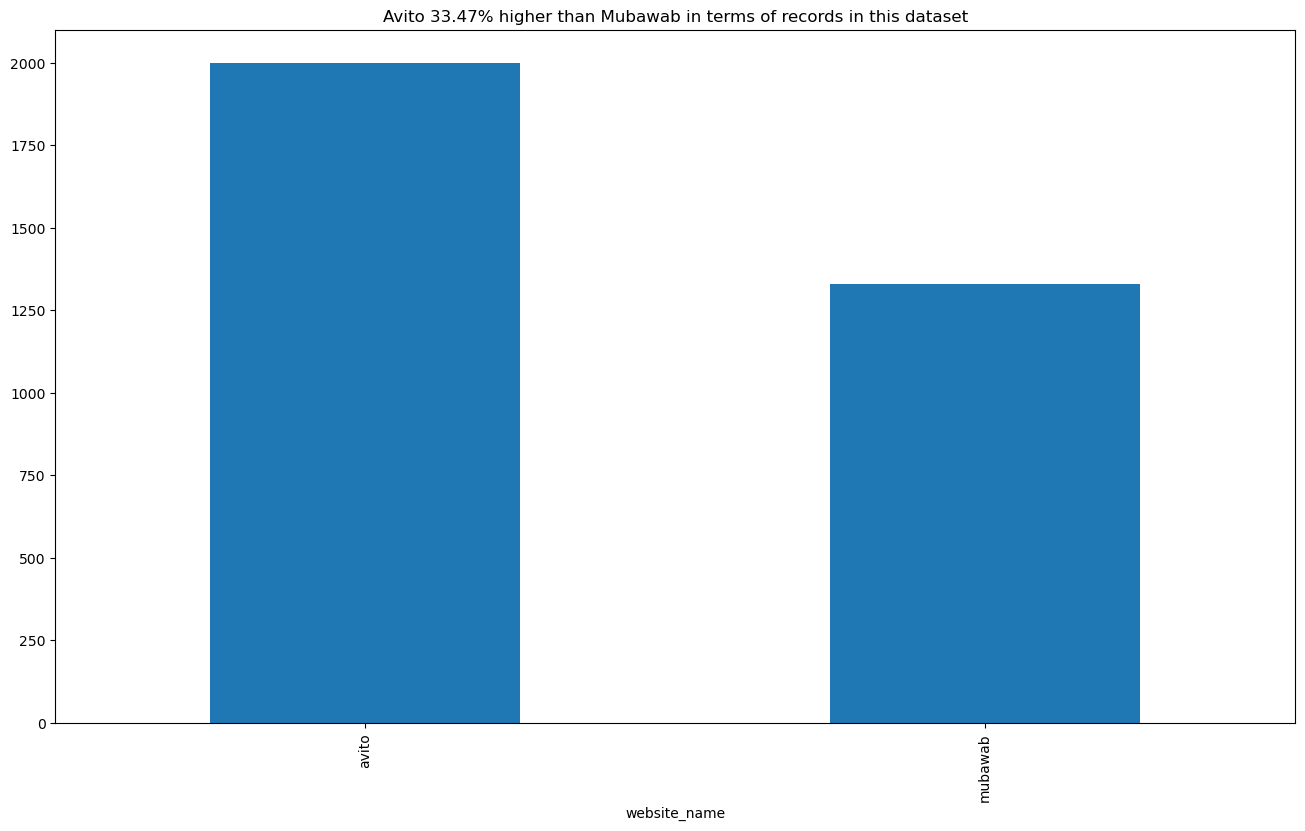

In [38]:
mh_dataset['website_name'].value_counts().plot(kind='bar')
plt.title(f"{highest_count['name'].capitalize()} {round(r, 2)}% higher than {lowest_count['name'].capitalize()} in terms of records in this dataset")
plt.show()

In [39]:
mh_dataset.rename(columns={"advertisement_url": "url"}, inplace=True)

## 3.5 'title' column cleaning

**Summary :**

- **Add** 'ad_type' column based on current column 'title', 'feature_list' column and 'price'.
- **Add** 'property_type' column based on current column 'title' and 'feature_list' column.
- **Add** 'property_surface_from_title_m²' column based on current column 'title'.

   --> so we can keep surface information if not exist in "feature_list" column.

- **Analyze** all titles by counting the most appeared words.
- **Analyze** the new column 'roperty_surface_from_title_m²', and gather new insight from it.

In [40]:
mh_dataset['title']

0              Appartement de 100m² en vente Noor Asilah 
1         Luxueux studio à vendre 63m² La Ferme Bretonne 
2         Studio de Luxe à Palmier 1ère étage, Ascenseur 
3                               Vente appartement rénové 
4                               Bel appartement spacieux 
                              ...                        
3324                              ferme en Vente barashwa
3325                    Appartements familiale à côté CHU
3326                PENTHOUSE à louer à MARINA CASABLANCA
3327         Appartement haut standing 70 m² à Casablanca
3328    Maison 2 Niveaux 121m2 Sidi Hajjaj Tit Mellil ...
Name: title, Length: 3329, dtype: object

### 3.5 - 1/ Counting Unique Words :

I will create a "word counts" dictionary which will contain all ***unique words*** as keys and ***their occurrences*** as values.

This step will give us an ***overall overview*** of the titles in this dataset.

In [41]:
def get_unique_words(list, stop_words):
    # Combine all texts into one
    combined_text = " ".join(list)

    # Converte text to lowercase to ensure word comparison is not case sensitive + delete any character that is not a letter, number, or space.
    combined_text = re.sub(r'[^\w\s]', ' ', combined_text.lower())

    # Retrieve all words in the test
    words = combined_text.split()

    # Count the occurrences of each word
    unique_words_dict = Counter(words)

    filtered_dict = {key: value for key, value in unique_words_dict.items() if key not in stop_words}
    
    return filtered_dict

In [42]:
unique_words_from_titles = dict(get_unique_words(list(mh_dataset['title']), all_stop_words))

In [43]:
len(unique_words_from_titles)

2473

In [44]:
unique_words_from_titles = {k: v for k, v in unique_words_from_titles.items() if v>1 and not has_numbers(k) and k.capitalize() not in MOROCCAN_CITIES }

In [45]:
len(unique_words_from_titles)

783

In [46]:
sorted_unique_words_from_titles = sorted(unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

In [47]:
sorted_unique_words_from_titles

[('appartement', 1989),
 ('vendre', 1096),
 ('m²', 886),
 ('chambres', 436),
 ('vente', 427),
 ('louer', 303),
 ('villa', 220),
 ('bel', 185),
 ('meublé', 182),
 ('studio', 149),
 ('terrain', 142),
 ('location', 134),
 ('surface', 129),
 ('hay', 110),
 ('résidence', 95),
 ('centre', 92),
 ('superbe', 85),
 ('neuf', 79),
 ('el', 73),
 ('standing', 72),
 ('شقة', 72),
 ('appart', 71),
 ('bureau', 70),
 ('al', 69),
 ('tanger', 67),
 ('superficie', 65),
 ('ville', 65),
 ('piscine', 64),
 ('vend', 62),
 ('terrasse', 61),
 ('californie', 59),
 ('haut', 56),
 ('totale', 55),
 ('belles', 54),
 ('appartements', 53),
 ('للبيع', 52),
 ('magnifique', 51),
 ('achat', 50),
 ('quartier', 50),
 ('vue', 49),
 ('belle', 48),
 ('bien', 48),
 ('très', 48),
 ('للكراء', 48),
 ('pièces', 47),
 ('luxe', 46),
 ('maison', 45),
 ('duplex', 44),
 ('vide', 44),
 ('magasin', 43),
 ('jardin', 40),
 ('sidi', 40),
 ('agréables', 38),
 ('hôpitaux', 38),
 ('agdal', 38),
 ('parking', 38),
 ('commercial', 38),
 ('guéliz', 

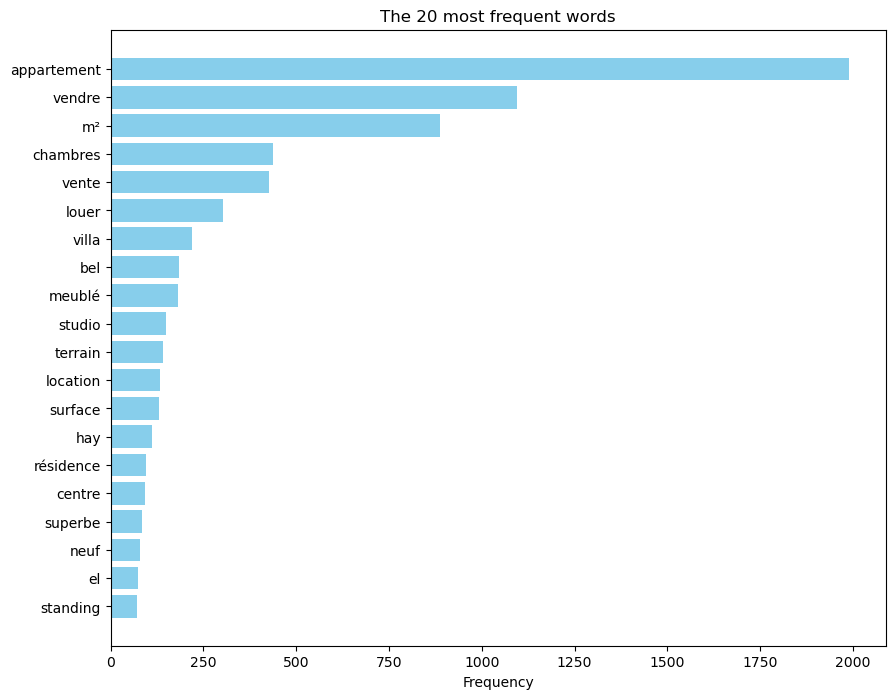

In [48]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

In [49]:
from wordcloud import WordCloud

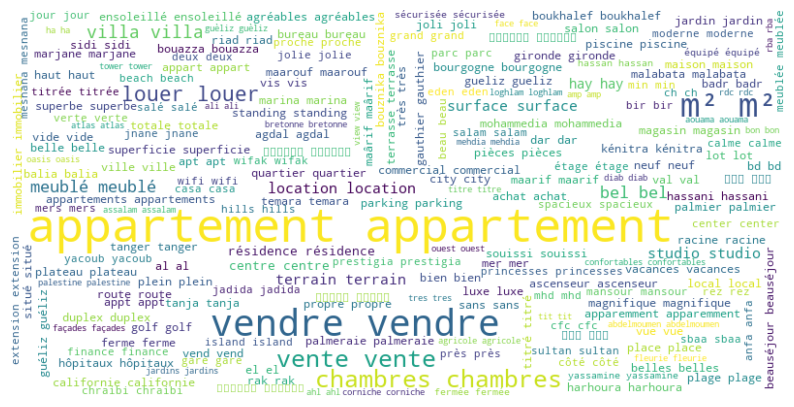

In [50]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
specific_stop_words = {"m²", "bel", "al", "el", "très", "bien", "hay","haut","belles","quartier","eden","vue","belle","badr","sidi","db","rak","racine","في","pièces","magnifique","beau","mhd","val","agréable","hills","lot","apparemment","plein","route","jnane"}

In [52]:
sorted_unique_words_from_titles = {key: value for key, value in dict(sorted_unique_words_from_titles).items() if key not in specific_stop_words}
sorted_unique_words_from_titles = sorted(sorted_unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

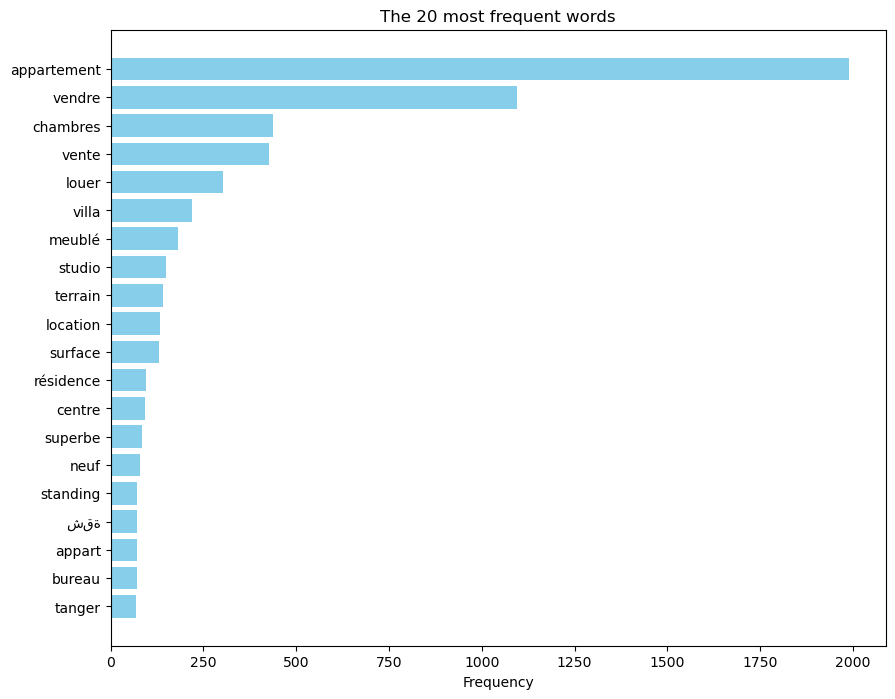

In [53]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

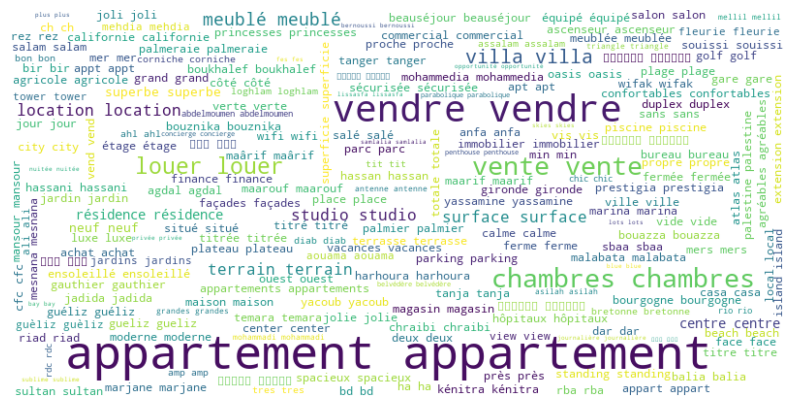

In [54]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3.5 - 2/ Extract the type of the ad (Sale/Rental/Vocation Rental) from the title AND JUST FOR AVITO RECORS:

because, We have scraped data from the Mubawab platform in an organized manner, as the sales, rental, and vacation rental announcements are categorized separately. BUT ON AVITO PLATFORM, announcements are not orginized so we need to extract the type of the announcement.

In [55]:
# def extract_ad_type_based_on_title_and_features_list_and_price_columns(title, features_list, price, dictionary):
    
#     # IF the type of advertisement concerns the “Sale” of real estate. 
#     words = title.lower().split()
#     #     search for sales words entered by users ...
#     for word in words:
#         normalized_word = dictionary.get(word, None)
#         if normalized_word:
#             return normalized_word

#     # IF NOT A SALE AD, we are going to check if it's a Rental Vocation Ad.
#     if 'night' in price.lower() or 'day' in price.lower() or 'nuit' in price.lower() or 'jour' in price.lower() or 'vacance' in title.lower() or 'locations de vacances' in features_list.lower():
#         return 'Vacation Rentals'

#     if 'location' in title.lower() or 'loue' in title.lower() or 'rent' in title.lower() or 'rent' in features_list.lower() or 'location' in features_list.lower():
#         return 'Rentals'
        
#     return 'Others'

In [59]:
def extract_ad_type(title, features_list, price, complete_description):
    
    # IF the type of advertisement concerns the “Sale” of real estate. 
    sales_keywords = ['sell', 'sels', 'sells', 'sold', 'selling', 'sale', 'sall', 'vend', 'vent']
    if any(keyword in title.lower() for keyword in sales_keywords) or any(keyword in features_list.lower() for keyword in sales_keywords) or any(keyword in complete_description.lower() for keyword in sales_keywords):
        return 'Sales'
    
    # Check for vacation rental keywords in price, features list and title columns.
    price_keywords = ['night', 'day', 'nuit', 'jour']
    if any(keyword in price.lower() for keyword in price_keywords) or 'vacance' in title.lower() or 'locations de vacances' in features_list.lower():
        return 'Vacation Rentals'

    # Check for rental keywords in title and features list
    rental_keywords = ['location', 'loue', 'rent', "كراء"]
    if any(keyword in title.lower() for keyword in rental_keywords) or any(keyword in features_list.lower() for keyword in rental_keywords):
        return 'Rentals'

    if 'locations de vacances' in complete_description.lower() or 'Vacation Rentals' in complete_description.lower():
        return 'Vacation Rentals'

    if any(keyword in complete_description.lower() for keyword in rental_keywords):
        return 'Rentals'
        
    return 'Others'

In [61]:
mh_dataset['ad_type'] = mh_dataset.apply(lambda row: extract_ad_type(row['title'], row['features_list'], row['price'], row['complete_description']) if row['website_name'] == 'avito' else row['ad_type'], axis=1)

<Axes: xlabel='ad_type'>

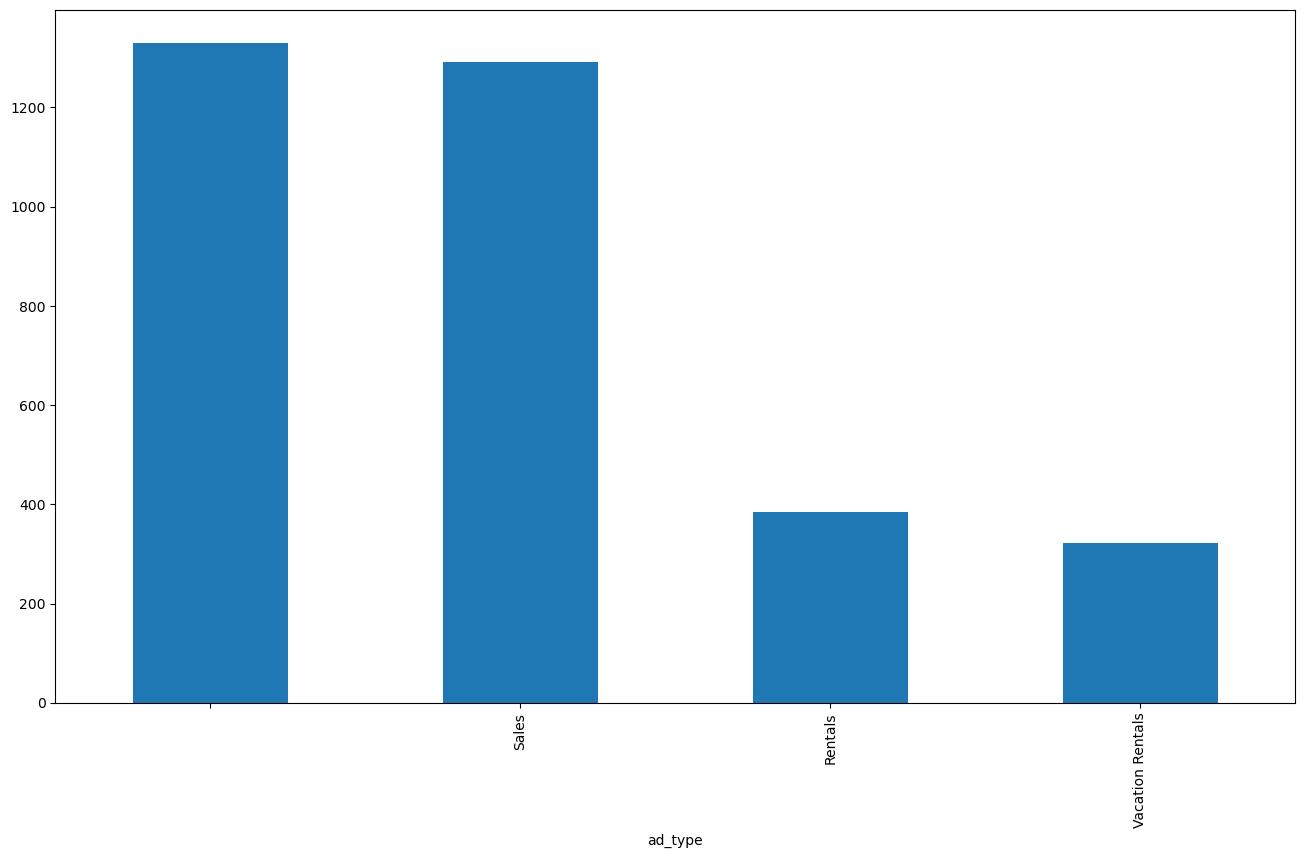

In [62]:
mh_dataset['ad_type'].value_counts().plot(kind="bar")

### 3.5 - 3/ Extract the surface of the property:

In [63]:
def extract_property_surface(title, description, complete_description):
    try :
        property_surface_pattern = r'\b(\d+)\s*m²\b'
        match = re.search(property_surface_pattern, title)
        if match:
            return int(match.group(0).split("m²")[0].replace(" ", ""))
    except:
        pass

    try:
        match = re.match(r'\b\w*[;,]?(\d+\s*m²)\b', description)
        if match:
            return re.findall(r'\d+', match.group())[0]
    except:
        pass

    try:
        match = re.match(r'\b\w*[;,]?(\d+\s*m²)\b', complete_description)
        if match:
            return re.findall(r'\d+', match.group())[0]
    except:
        pass
        
    return None

In [64]:
mh_dataset['property_surface_m²'] = mh_dataset.apply(lambda row: extract_property_surface(row['title'], row['description'], row['complete_description']), axis=1)

In [65]:
mh_dataset['property_surface_m²'].describe()

count    1111.000000
mean      159.857786
std       467.981947
min         4.000000
25%        76.000000
50%        98.000000
75%       133.500000
max      9500.000000
Name: property_surface_m², dtype: float64

In [66]:
sum(mh_dataset['property_surface_m²'].isna()), len(mh_dataset['property_surface_m²'])

(2218, 3329)

In [67]:
mh_dataset[['property_surface_m²', 'website_name']].head(3)

,property_surface_m²,website_name
0,100.0,mubawab
1,63.0,mubawab
2,NaN,mubawab


In [68]:
sub_set = mh_dataset[['property_surface_m²', 'website_name']]

In [69]:
sub_set = sub_set[sub_set['property_surface_m²']  < 1000 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


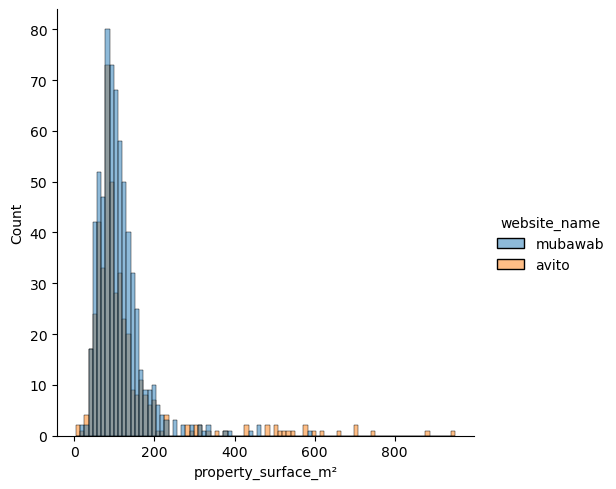

In [70]:
sns.displot(sub_set, x='property_surface_m²', hue='website_name')

In [71]:
sub_set = sub_set[sub_set['property_surface_m²']  < 300 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

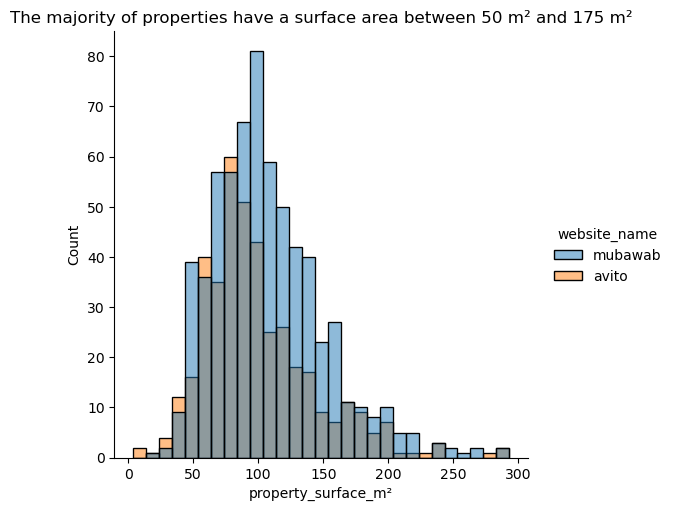

In [72]:
sns.displot(sub_set, x='property_surface_m²', hue='website_name')
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

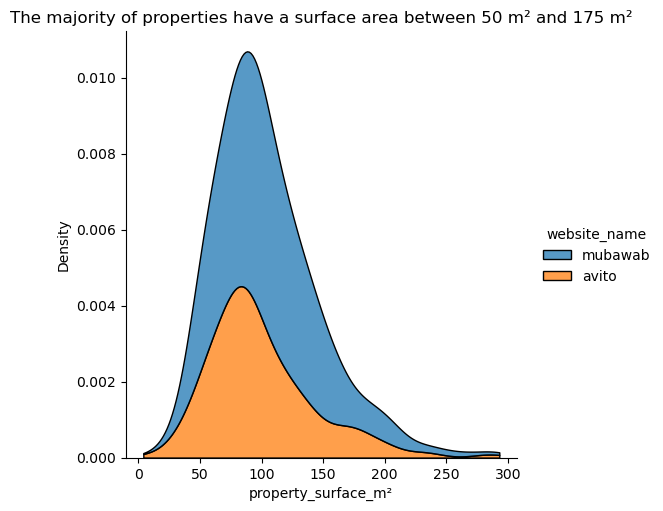

In [73]:
# Kernel density estimation
sns.displot(sub_set, x='property_surface_m²', hue='website_name', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

### 3.5 - 4/ Extract the type of the property:

In [74]:
mh_dataset.head(1)

,url,title,publication_date,price,location,description,complete_description,features_list,insert_date,website_name,ad_type,property_surface_m²
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,,100.0


In [75]:
def extract_property_type(title, features_list):
    title__ =  title.lower()
    features_list__ = features_list.lower()

    apartments_keywords = ['apartment', 'apart', 'aprt', 'aprtmnt', 'aprtment', 'apprt', 'appartement', 'appartment', 'duplex', 'triplex', 'studio', 'شقة']
    land_and_farms_keywords = ['land', 'farm', 'terrain', 'terain', 'teran', 'ferm', 'firm', 'ranche', 'أرض', 'مزرعة']
    houses_keywords = ['house', 'hous', 'maison', 'cottage', 'chalet', 'منزل']
    villas_riads_keywords = ['villa', 'vila', 'riad', 'riyad', 'ryad', 'castle', 'château', 'فيلا', 'رياض']
    desks_keywords = ['desktop', 'desk', 'desc', 'disk', 'bureau', 'office', 'مكتب']
    flatsharing_keywords = ['flatsharing', 'flatshar', 'colocation', 'roommate', 'romate', 'roommat', 'roomat']
    warehouse_keywords = ['magasin', 'store', 'stor', 'warehouse', 'warehous', 'warehouse', 'storehouse', 'magazine', 'magazin', 'مستودع']

    
    if any(keyword in title__ for keyword in apartments_keywords):
        return 'Apartments'
    elif any(keyword in title__ for keyword in land_and_farms_keywords):
        return 'Land and Farms'
    elif any(keyword in title__ for keyword in houses_keywords):
        return 'Houses'
    elif any(keyword in title__ for keyword in villas_riads_keywords):
        return 'Villas and Riads'    
    elif any(keyword in title__ for keyword in desks_keywords):
        return 'Desks'
    elif any(keyword in title__ for keyword in flatsharing_keywords):
        return "Flatsharing"
    elif any(keyword in title__ for keyword in warehouse_keywords):
        return "Warehouses"
    elif any(keyword in features_list__ for keyword in apartments_keywords):
        return 'Apartments'
    elif any(keyword in features_list__ for keyword in land_and_farms_keywords):
        return 'Land and Farms'
    elif any(keyword in features_list__ for keyword in houses_keywords):
        return 'Houses'
    elif any(keyword in features_list__ for keyword in villas_riads_keywords):
        return 'Villas and Riads'    
    elif any(keyword in features_list__ for keyword in desks_keywords):
        return 'Desks'
    elif any(keyword in features_list__ for keyword in flatsharing_keywords):
        return "Flatsharing"
    elif any(keyword in features_list__ for keyword in warehouse_keywords):
        return "Warehouses"
    else:
        return "Other Real Estate"

In [76]:
mh_dataset['property_type'] = mh_dataset.apply(lambda row: extract_property_type(row['title'], row['features_list']), axis=1)

In [77]:
unique_property_type_values = mh_dataset['property_type'].unique()
unique_property_type_values

array(['Apartments', 'Houses', 'Land and Farms', 'Desks',
       'Villas and Riads', 'Flatsharing', 'Other Real Estate',
       'Warehouses'], dtype=object)

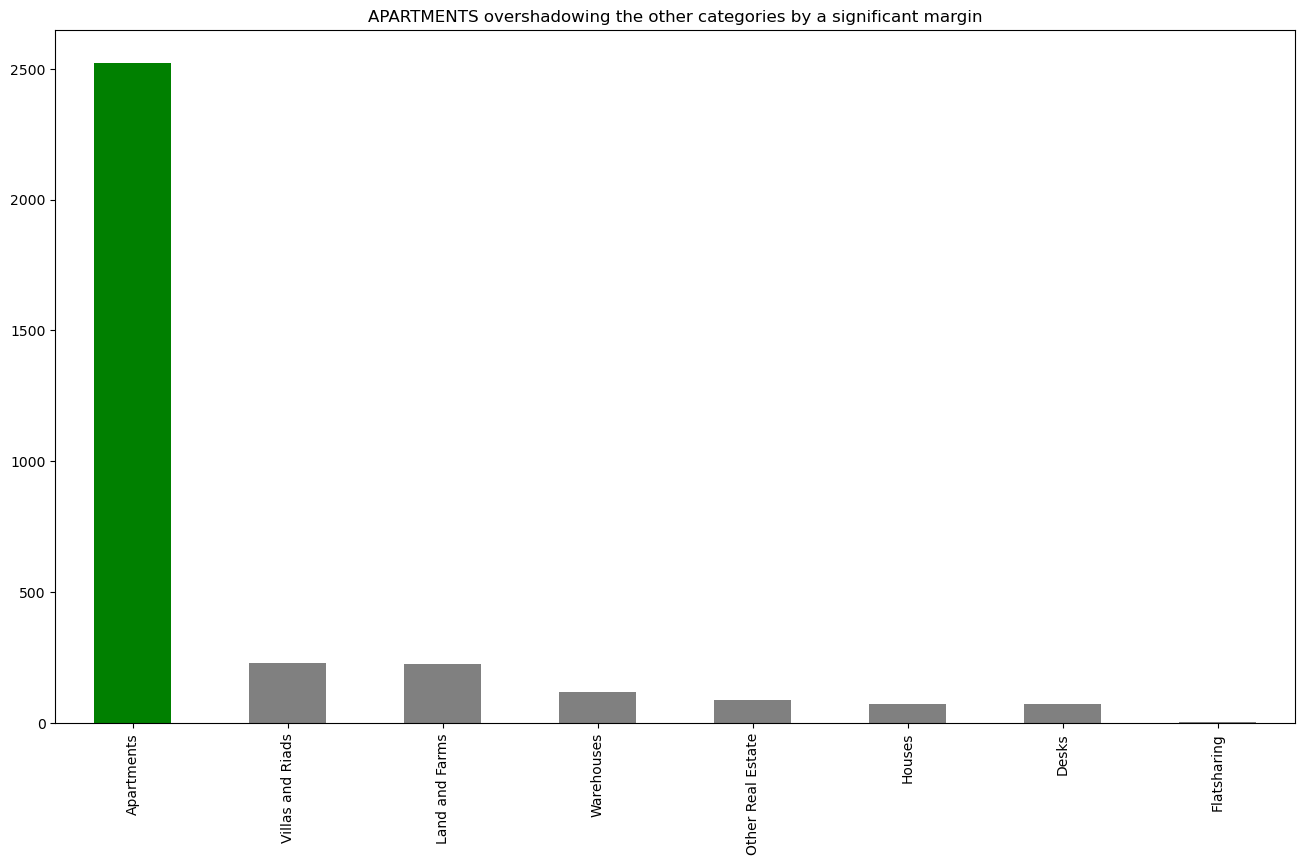

In [78]:
colors = ["g"] + ["gray"] * (len(unique_property_type_values)-1)
mh_dataset['property_type'].value_counts().plot(kind="bar", xlabel="", color=colors)
plt.title("APARTMENTS overshadowing the other categories by a significant margin")
plt.show()

In [79]:
mh_dataset.head(1)

,url,title,publication_date,price,location,description,complete_description,features_list,insert_date,website_name,ad_type,property_surface_m²,property_type
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,,100.0,Apartments


## 3.6 'publication_date' column cleaning

**Summary :**

- Added year, month, day of publication columns based on current column 'publication_date' and 'insert_date'.

In [80]:
mh_dataset['publication_date']

0       Publié aujourdhui
1       Publié aujourdhui
2       Publié aujourdhui
3       Publié aujourdhui
4       Publié aujourdhui
              ...        
3324      il y a 5 heures
3325      il y a 5 heures
3326      il y a 5 heures
3327      il y a 5 heures
3328      il y a 5 heures
Name: publication_date, Length: 3329, dtype: object

In [81]:
mh_dataset['publication_date'].unique()

array(['Publié aujourdhui', 'Publié il y a 1 jour',
       'Publié il y a 2 jours', 'Publié il y a 4 jours',
       'Publié il y a 3 jours', 'Publié il y a 5 jours',
       'Publié il y a 1 semaine', 'il y a 8 minutes', 'il y a 9 minutes',
       'il y a 21 minutes', 'il y a 26 minutes', 'il y a 20 minutes',
       'il y a 24 minutes', 'il y a 18 minutes', 'il y a 16 minutes',
       'il y a 33 minutes', 'il y a 28 minutes', 'il y a 29 minutes',
       'il y a 31 minutes', 'il y a 30 minutes', 'il y a 36 minutes',
       'il y a 37 minutes', 'il y a 41 minutes', 'il y a 35 minutes',
       'il y a 32 minutes', 'il y a 43 minutes', 'il y a 40 minutes',
       'il y a 45 minutes', 'il y a 39 minutes', 'il y a 42 minutes',
       'il y a 50 minutes', 'il y a 44 minutes', 'il y a 57 minutes',
       'il y a 56 minutes', 'il y a 55 minutes', 'il y a 59 minutes',
       'il y a 54 minutes', 'il y a 58 minutes', 'il y a 52 minutes',
       'il y a 1 heure', 'il y a 53 minutes', 'il y a 2 heur

In [82]:
def convert_to_datetime(pub_date, insert_date):
    insert_date = insert_date.split(" ")[0]
    current_date = datetime.strptime(insert_date, "%Y-%m-%d")
    
    if 'aujourdhui' in pub_date:
        return current_date
        
    num_match = re.search(r'\d+', pub_date)
    if not num_match:
        return np.nan
    
    num = int(num_match.group())

    current_date = current_date + timedelta(hours=23, minutes=59) 
    if 'minute' in pub_date:
        return current_date - timedelta(minutes=num)
    elif 'heure' in pub_date or 'hour' in pub_date:
        return current_date - timedelta(hours=num)
    elif 'jour' in pub_date or 'day' in pub_date:
        return current_date - timedelta(days=num)
    elif 'semaine' in pub_date or 'week' in pub_date:
        return current_date - timedelta(weeks=num)
    elif 'mois' in pub_date or 'month' in pub_date:
        return current_date - relativedelta.relativedelta(months=num)
    elif 'année' in pub_date or 'year' in pub_date:
        return current_date - relativedelta.relativedelta(years=num)
    else:
        return np.nan

In [83]:
mh_dataset.rename(columns={'publication_date': 'ad_date'}, inplace=True)

In [84]:
mh_dataset.apply(lambda x: convert_to_datetime(x['ad_date'], x['insert_date']), axis=1)

0      2024-05-17 00:00:00
1      2024-05-17 00:00:00
2      2024-05-17 00:00:00
3      2024-05-17 00:00:00
4      2024-05-17 00:00:00
               ...        
3324   2024-05-21 18:59:00
3325   2024-05-21 18:59:00
3326   2024-05-21 18:59:00
3327   2024-05-21 18:59:00
3328   2024-05-21 18:59:00
Length: 3329, dtype: datetime64[ns]

In [86]:
mh_dataset['ad_date'] = mh_dataset.apply(lambda x: convert_to_datetime(x['ad_date'], x['insert_date']), axis=1)

In [87]:
mh_dataset['year'] = mh_dataset['ad_date'].apply(lambda x: x.year)
mh_dataset['month'] = mh_dataset['ad_date'].apply(lambda x: x.month)
mh_dataset['day'] = mh_dataset['ad_date'].apply(lambda x: x.day)

In [88]:
mh_dataset['ad_date'] = mh_dataset['ad_date'].apply(lambda x: str(x).split()[0])

In [89]:
mh_dataset.head(1)

,url,title,ad_date,price,location,description,complete_description,features_list,insert_date,website_name,ad_type,property_surface_m²,property_type,year,month,day
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,,100.0,Apartments,2024,5,17


## 3.7 'price' column cleaning

**Summary :**

- **add** 'property_price', 'price_currency', 'price per priod (for rental ad)' columns based on the current one.

In [90]:
mh_dataset['price']

0        Prix à consulter 
1            1 450 000 DH 
2                7 800 DH 
3            1 500 000 DH 
4            1 200 000 DH 
               ...        
3324     Prix non spécifié
3325          250 DH /Nuit
3326             45 000 DH
3327            880 000 DH
3328          1 200 000 DH
Name: price, Length: 3329, dtype: object

In [96]:
mh_dataset['price'].unique()

array([' Prix à consulter ', '1 450 000 DH ', '7 800 DH ',
       '1 500 000 DH ', '1 200 000 DH ', '450 000 DH ', '1 020 000 DH ',
       '2 820 000 DH ', '1 480 000 DH ', '3 200 000 DH ', '2 670 000 DH ',
       '1 162 000 DH ', '928 800 DH ', '250 000 DH ', '1 300 000 DH ',
       '1 600 000 DH ', '2 795 000 DH ', '1 675 000 DH ', '1 092 000 DH ',
       '1 750 000 DH ', '720 000 DH ', '372 000 DH ', '1 260 000 DH ',
       '2 700 000 DH ', '1 400 000 DH ', '2 440 000 DH ', '675 000 DH ',
       '740 000 DH ', '1 110 000 DH ', '500 000 DH ', '1 280 000 DH ',
       '1 015 000 DH ', '1 140 000 DH ', '2 180 000 DH ', '790 000 DH ',
       '1 350 000 DH ', '2 550 000 DH ', '2 200 000 DH ', '3 542 000 DH ',
       '2 850 000 DH ', '1 196 000 DH ', '1 420 000 DH ', '830 000 DH ',
       '1 120 000 DH ', '430 000 DH ', '1 077 000 DH ', '750 000 DH ',
       '1 083 800 DH ', '1 375 000 DH ', '820 000 DH ', '650 000 DH ',
       '3 670 000 DH ', '460 000 DH ', '800 000 DH ', '690 000 DH ',


As we have noticed, there are multiple forms of price descriptions in our dataset:

- **Regular Form**: The price of the property followed by its currency (e.g., "1000 DH").

- **Rental Form**: For rental ads, the price may be specified per night. This can appear directly like the regular form (e.g., "150 DH") or with an additional string at the end of the price (e.g., "150 DH/Nuit" or "150 DH/Night").

- **Unspecified Price**: Sometimes, the ad owner does not specify the price, either for sale or rental, and this is indicated by strings like "Prix non spécifié" or left blank ("").

To handle these variations, we will standardize the price descriptions in our dataset, ensuring consistency and improving data quality.

In [97]:
def extract_price(price_description):
    
    # Patterns to match each different price descriptions
    regular_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*', re.IGNORECASE)
    rental_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*/\s*(\w+)\s*', re.IGNORECASE)
    unspecified_patterns = [re.compile(r'\s*prix\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*price\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*prix\s*à\s*consulter\s*', re.IGNORECASE),
                            re.compile(r'\s*gratuit\s*', re.IGNORECASE),
                            re.compile(r'\s*free\s*', re.IGNORECASE),
                            re.compile(r'^\s*$')]

    # Check for unspecified price first
    for pattern in unspecified_patterns:
        if pattern.match(price_description):
            return {'price': None, 'currency': None}

    # Check for rental form
    rental_match = rental_pattern.match(price_description)
    if rental_match:
        price, currency, period = rental_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency, 'period': period}

    # Check for regular form
    regular_match = regular_pattern.match(price_description)
    if regular_match:
        price, currency = regular_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency}

    return {'price': None, 'currency': None}

In [99]:
mh_dataset['price'].apply(lambda x: extract_price(x)).tolist()

[{'price': None, 'currency': None},
 {'price': 1450000, 'currency': 'DH'},
 {'price': 7800, 'currency': 'DH'},
 {'price': 1500000, 'currency': 'DH'},
 {'price': 1200000, 'currency': 'DH'},
 {'price': 450000, 'currency': 'DH'},
 {'price': 1020000, 'currency': 'DH'},
 {'price': 2820000, 'currency': 'DH'},
 {'price': 1480000, 'currency': 'DH'},
 {'price': 3200000, 'currency': 'DH'},
 {'price': 2670000, 'currency': 'DH'},
 {'price': 1162000, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 928800, 'currency': 'DH'},
 {'price': 250000, 'currency': 'DH'},
 {'price': 1300000, 'currency': 'DH'},
 {'price': 1600000, 'currency': 'DH'},
 {'price': 2795000, 'currency': 'DH'},
 {'price': 2820000, 'currency': 'DH'},
 {'price': 1675000, 'currency': 'DH'},
 {'price': 1092000, 'currency': 'DH'},
 {'price': 1750000, 'currency': 'DH'},
 {'price': 720000, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 372000, 'currency': 'DH'},
 {'price': 1260000, 'currency': 'DH'},
 {'

In [100]:
extracted_prices = pd.DataFrame(mh_dataset['price'].apply(lambda x: extract_price(x)).tolist())
extracted_prices.columns = ['property_price', 'price_currency', 'price_per_priod_(for_rental_ad)']
extracted_prices

,property_price,price_currency,price_per_priod_(for_rental_ad)
0,NaN,None,NaN
1,1450000.0,DH,NaN
2,7800.0,DH,NaN
3,1500000.0,DH,NaN
4,1200000.0,DH,NaN
...,...,...,...
3324,NaN,None,NaN
3325,250.0,DH,Nuit
3326,45000.0,DH,NaN
3327,880000.0,DH,NaN


In [104]:
mh_dataset = mh_dataset.join(extracted_prices)
mh_dataset.head(2)

,url,title,ad_date,price,location,description,complete_description,features_list,insert_date,website_name,ad_type,property_surface_m²,property_type,year,month,day,property_price,price_currency,price_per_priod_(for_rental_ad)
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,,100.0,Apartments,2024,5,17,NaN,None,NaN
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,2024-05-17,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17,mubawab,,63.0,Apartments,2024,5,17,1450000.0,DH,NaN


In [105]:
del mh_dataset['price']

## 3.8 'location' column cleaning

**Summary :**

- **Clean** current column.
- **Visualize** data + **insight gathering**.

In [106]:
mh_dataset['location']

0                                         Asilah 
1       Ferme Bretonne (Hay Arraha) à Casablanca 
2                           Palmier à Casablanca 
3                        Val Fleury à Casablanca 
4                      Route de Safi à Marrakech 
                          ...                    
3324                                    Khemisset
3325                                        Oujda
3326                                   Casablanca
3327                                   Casablanca
3328                      Sidi Hajjaj Oued Hassar
Name: location, Length: 3329, dtype: object

In [107]:
mh_dataset['location'].unique()

array(['Asilah ', 'Ferme Bretonne (Hay Arraha) à Casablanca ',
       'Palmier à Casablanca ', 'Val Fleury à Casablanca ',
       'Route de Safi à Marrakech ', 'Route Amizmiz à Marrakech ',
       'Tanja Balia à Tanger ', 'Plage Oued Cherrat à Bouznika ',
       'Port à Casablanca ', 'Gauthier à Casablanca ',
       'Guéliz à Marrakech ', 'Centre à Tanger ',
       'Hay Mohammadi à Casablanca ', 'Bernoussi à Casablanca ',
       'Ennakhil (Palmeraie) à Marrakech ', 'Tamesna ',
       'Nassim 1 à Casablanca ', 'Centre Ville à Mohammedia ',
       'Casablanca ', 'Al Azhar à Casablanca ', 'Ghazoua à Essaouira ',
       'Nouaceur ', 'Ahl Loghlam (Hay Assalam) à Casablanca ',
       'Ain Chock à Casablanca ', 'Moujahidine à Tanger ', 'Zenata ',
       'Wafa à Mohammedia ', 'Marjane à Tanger ', 'Boukhalef à Tanger ',
       'Malabata à Tanger ', 'Tanger City Center à Tanger ',
       'Ain Amiyer à Fès ', "Triangle d'Or à Casablanca ",
       'Nassim 2 à Casablanca ', 'Hay Al Rajaa Fillah à R

In [108]:
def extract_city_from_location(location):
    if 'à' in location:
        return location.split('à')[-1].strip()
    else:
        return location.strip()

In [109]:
mh_dataset['location']

0                                         Asilah 
1       Ferme Bretonne (Hay Arraha) à Casablanca 
2                           Palmier à Casablanca 
3                        Val Fleury à Casablanca 
4                      Route de Safi à Marrakech 
                          ...                    
3324                                    Khemisset
3325                                        Oujda
3326                                   Casablanca
3327                                   Casablanca
3328                      Sidi Hajjaj Oued Hassar
Name: location, Length: 3329, dtype: object

In [110]:
mh_dataset['location'] = mh_dataset['location'].apply(lambda x: extract_city_from_location(x))

In [111]:
unique_cities = mh_dataset['location'].unique()
unique_cities

array(['Asilah', 'Casablanca', 'Marrakech', 'Tanger', 'Bouznika',
       'Tamesna', 'Mohammedia', 'Essaouira', 'Nouaceur', 'Zenata', 'Fès',
       'Rabat', 'Meknes', 'Oujda', 'Bouskoura', 'Martil', 'Tit Mellil',
       'Agadir', 'Kénitra', 'Dar Bouazza', 'Deroua', 'Safi', 'Sidi Rahal',
       'Tétouan', 'Benslimane', 'Berrechid', 'Harhoura', 'Temara',
       'Fnideq', 'Salé', 'El Jadida', 'Al Hoceima', 'Skhirat', 'Gueznaia',
       'Saïdia', 'Ain Attig', 'Sidi Rahal Chatai', 'Azemmour', "M'Diq",
       'El Menzeh', 'Had Soualem', 'Aïn Harrouda', 'Ifrane', 'Dakhla',
       'Meknassa Acharqia', 'El Mansouria', 'Errahma', 'Ait Melloul',
       'Oued Laou', 'Sidi Bouzid', 'Tnine Aglou', 'Meknès', 'Bir Jdid',
       'Taghazout', 'Béni Mellal', 'مراكش', 'Mehdia', 'Al Haouz',
       'Timoulilt', 'Khouribga', 'Tifelt', 'طنجة', 'Saidia',
       'Sidi Allal El Bahraoui', 'Nador', 'Fdalate',
       'Al Oioun Sidi Mellouk', 'Souk El Arbaa', 'Berkane', 'Tiznit',
       'Lamharza Essahel', 'Midelt',

In [112]:
city_normalize = {
"طنجة" : "Tanger",
"Meknes" : "Meknès",
"القنيطرة" : "Kénitra",
"تمارة" : "Temara",
"مراكش" : "Marrakech",
"أكادير" : "Agadir",
"فاس" : "Fès",
"الدار البيضاء" : "Casablanca"
}

In [114]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))
print(sum(mh_dataset['location'] == "أكادير"))
print(sum(mh_dataset['location'] == "فاس"))
print(sum(mh_dataset['location'] == "الدار البيضاء"))

2
7
1
1
4
1
1
1


In [115]:
 mh_dataset['location'] = mh_dataset['location'].apply(lambda x: city_normalize[x] if x in city_normalize.keys() else x)

In [116]:
print(sum(mh_dataset['location'] == "طنجة"))
print(sum(mh_dataset['location'] == "Meknes"))
print(sum(mh_dataset['location'] == "القنيطرة"))
print(sum(mh_dataset['location'] == "تمارة"))
print(sum(mh_dataset['location'] == "مراكش"))
print(sum(mh_dataset['location'] == "أكادير"))
print(sum(mh_dataset['location'] == "فاس"))
print(sum(mh_dataset['location'] == "الدار البيضاء"))

0
0
0
0
0
0
0
0


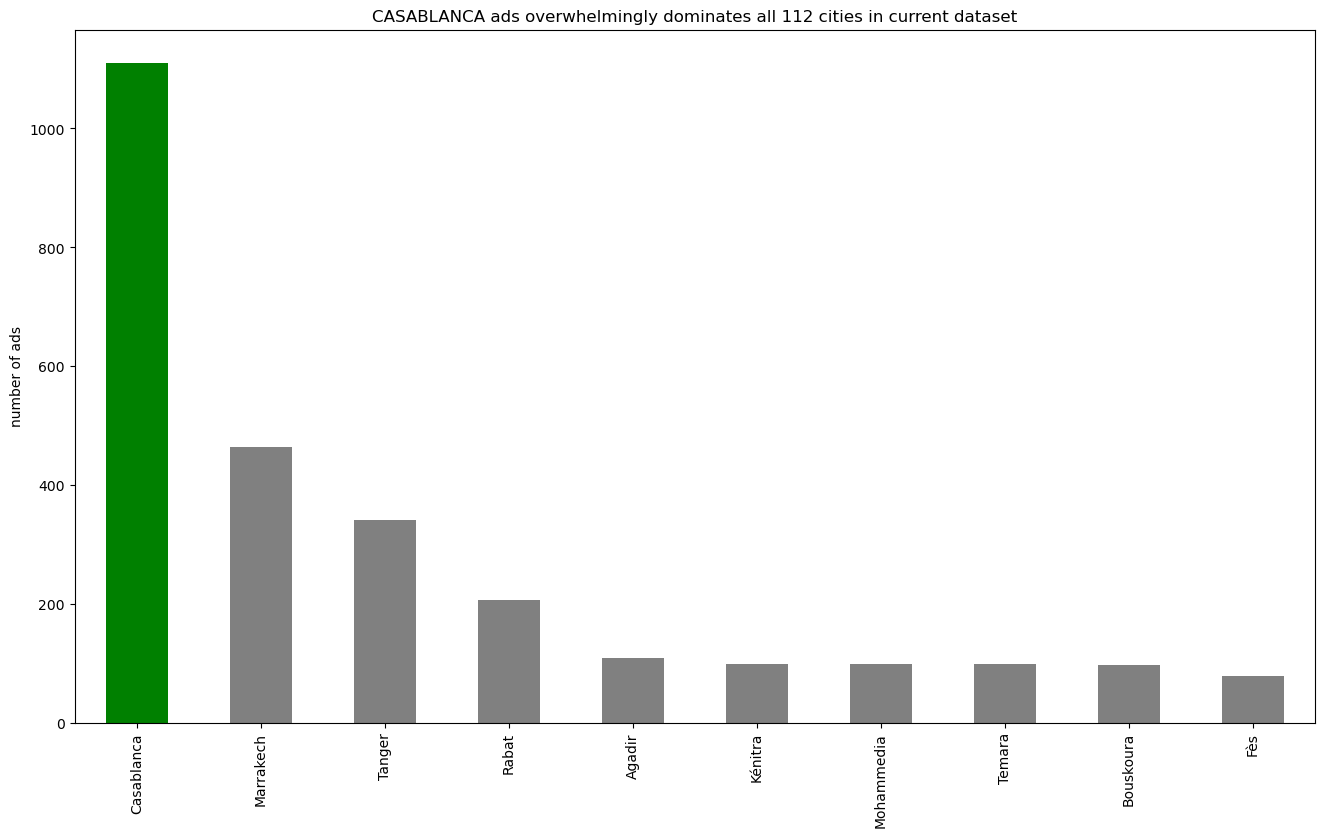

In [117]:
top_10_locations_in_current_dataset = mh_dataset['location'].value_counts().head(10)
colors = ['g'] + ['gray'] * (len(top_10_locations_in_current_dataset)-1)
top_10_locations_in_current_dataset.plot(kind="bar", xlabel='', ylabel='number of ads', color=colors)
plt.title(f'{top_10_locations_in_current_dataset.keys()[0].upper()} ads overwhelmingly dominates all {len(unique_cities)} cities in current dataset')
plt.show()

## 3.9 'description' column cleaning

**Summary :**

- **Add** 'number of rooms' column.

In [ ]:
mh_dataset['description']

One of the most meaningful insight from this list of property descriptions is: 
the number of rooms.

So, let's extract this number.

In [118]:
mh_dataset['description']

0        100 m² ;3 Pièces;2 Chambres;2 Salles de bains
1            63 m² ;2 Pièces;1 Chambre;1 Salle de bain
2            62 m² ;2 Pièces;1 Chambre;1 Salle de bain
3          124 m² ;5 Pièces;3 Chambres;1 Salle de bain
4          103 m² ;4 Pièces;2 Chambres;1 Salle de bain
                             ...                      
3324                                               NaN
3325                                               NaN
3326                                               NaN
3327                                               NaN
3328                                               NaN
Name: description, Length: 3329, dtype: object

In [122]:
def extract_rooms_number(description):
    description = str(description)
    if description == "":
        return np.nan
    
    pieces_match = re.search(r'(\d+)\s*Pièces?', description)
    if pieces_match:
        return int(pieces_match.group(1))
    
    chambres_match = re.search(r'(\d+)\s*Chambres?', description)
    if chambres_match:
        return int(chambres_match.group(1))
    
    return np.nan

In [126]:
mh_dataset['rooms_number'] = mh_dataset['description'].apply(lambda x: extract_rooms_number(x) )

In [129]:
mh_dataset['rooms_number'].describe()

count    1329.000000
mean        3.374718
std         2.922620
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        99.000000
Name: rooms_number, dtype: float64

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


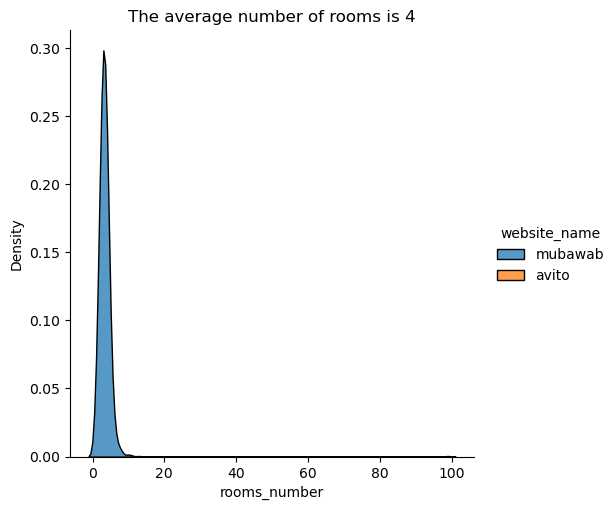

In [128]:
sns.displot(mh_dataset, x='rooms_number', hue='website_name', kind="kde", multiple="stack")
plt.title("The average number of rooms is 4")
plt.show()

# 4. More Cleaning

In [130]:
mh_dataset.head(1)

,url,title,ad_date,location,description,complete_description,features_list,insert_date,website_name,ad_type,property_surface_m²,property_type,year,month,day,property_price,price_currency,price_per_priod_(for_rental_ad),rooms_number
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,2024-05-17,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17,mubawab,,100.0,Apartments,2024,5,17,NaN,None,NaN,3.0


we are going to get ride of columns that are useless for future analysis.

- title
- description
- complete_description
- features_list
- insert_date

In [131]:
del mh_dataset["title"]
del mh_dataset["description"]
del mh_dataset["complete_description"]
del mh_dataset["features_list"]
del mh_dataset["insert_date"]

we gonna rename our columns :

In [132]:
mh_dataset.columns

Index(['url', 'ad_date', 'location', 'website_name', 'ad_type',
       'property_surface_m²', 'property_type', 'year', 'month', 'day',
       'property_price', 'price_currency', 'price_per_priod_(for_rental_ad)',
       'rooms_number'],
      dtype='object')

In [136]:
# mh_dataset.to_csv('market_housing_dateset.csv')

In [138]:
mh_dataset['ad_type'].unique()

array(['', 'Rentals', 'Sales', 'Vacation Rentals'], dtype=object)